# Importowanie i wczytywanie informacji o menu

In [1]:
# Moving to the main project directory
import os
os.chdir("..")

# Imports
from time import time
import numpy as np
import matplotlib.pyplot as plt

from bee_a_pizza.bees_algorithm.bees import bees_algorithm
from bee_a_pizza.import_export.import_pizzas import read_pizza_file
from bee_a_pizza.import_export.import_preferences import read_preferences_file
from bee_a_pizza.generators.order_generation import (
    generate_n_slices_per_customer,
    generate_preferences,
    get_preferences_by_slice,
)
from bee_a_pizza.bees_algorithm.solution_evaluation import get_cost
from bee_a_pizza.import_export.export import export_generated_customers

In [2]:
# Load pizzas
pizzas, pizza_names, ingredient_names, pizza_prices = read_pizza_file("data/pizzas.csv")

# Testowanie algorytmu na przykładach ze znanym optymalnym rozwiązaniem
W poniższych testach każdy zamawiający chce 8 kawałków (tyle ile jest w jednej pizzy).

In [7]:
def perfect_extremist_result(pizza_name):
    pizza_index = np.where(pizza_names == pizza_name)
    result = np.zeros(pizza_names.shape)
    result[pizza_index] = 1
    return result

def get_ingredients(pizza):
    if type(pizza) in (str, np.str_):
        pizza_index = np.where(pizza_names == pizza)
        pizza = pizzas[pizza_index]
        
    names = np.array(ingredient_names)
    return ' '.join(names[pizza.astype(bool)[0]])

def print_result(result, print_ingredients):
    result_sum = np.sum(result, axis=0, dtype=int)
    for i, n_slices in enumerate(result_sum):
        if n_slices != 0:
            print(f"{pizza_names[i]}s ordered: {n_slices / 8}")
            if print_ingredients:
                print(f"Ingredients: {get_ingredients(pizza_names[i])}")
            
def plot_cost_progression(cost_over_time, perfect_cost):
    plt.title("Cost progression")
    plt.ylabel("Cost")
    plt.xlabel("Iteration")
    
    plt.plot(cost_over_time)
    if perfect_cost is not None:
        plt.plot([perfect_cost] * len(cost_over_time))
    plt.show()
            
def test_preferences(preferences, n_slices, perfect_result=None, coefs=np.array([1, 2]), print_ingredients=False):
    slices = get_preferences_by_slice(preferences, n_slices)

    result, solutions_list = bees_algorithm(
        pizzas=pizzas, slices=slices, coefs=coefs,
    )

    print_result(result, print_ingredients)
    
    cost_over_time = [
        get_cost(
            results=sol,
            coefs=coefs,
            pizzas_ingredients=pizzas,
            preferences=slices,
        )
        for sol in solutions_list
    ]
    
    if perfect_result is None:
        perfect_cost = None
    else:
        perfect_cost = get_cost(
            results=perfect_result,
            coefs=coefs,
            pizzas_ingredients=pizzas,
            preferences=slices
        )

    plot_cost_progression(cost_over_time, perfect_cost)

In [26]:
pizza_names = np.array(pizza_names)

n_customers = 6
n_slices = np.ones(n_customers, dtype=int) * 8

margharita = pizzas[np.where(pizza_names == "Margharita")][0]
hawaiian = pizzas[np.where(pizza_names == "Hawajska")][0]
carbonara = pizzas[np.where(pizza_names == "Carbonara")][0]

margharita_extremist = np.where(margharita == 1, 1, -1)
hawaiian_extremist = np.where(hawaiian == 1, 1, -1)
carbonara_extremist = np.where(carbonara == 1, 1, -1)

margharita_result = perfect_extremist_result("Margharita")
hawaiian_result = perfect_extremist_result("Hawajska")
carbonara_result = perfect_extremist_result("Carbonara")

## Testowanie algorytmu w przypadku 6 fanatyków margharity

Test 1: Margharitas ordered: 6.0


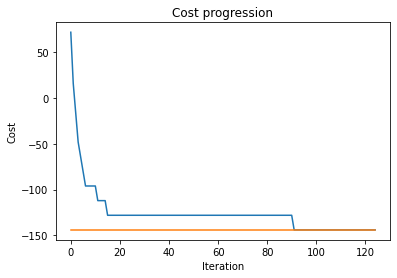

Test 2: Margharitas ordered: 6.0


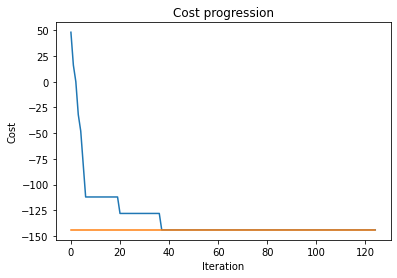

Test 3: Margharitas ordered: 5.0
Salamis ordered: 1.0


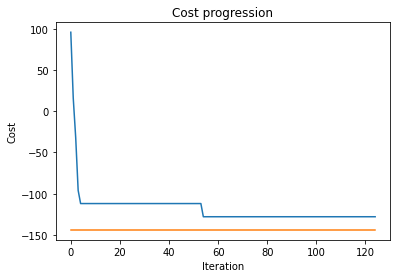

In [15]:
preferences = np.array([margharita_extremist] * 6)

perfect_result = np.array([margharita_result] * 8 * 6)

for i in range(3):
    print(f"Test {i + 1}: ", end='')
    test_preferences(preferences, n_slices, perfect_result)

## Testowanie algorytmu w przypadku 6 fanatyków hawajskiej

Test 1: Hawajskas ordered: 6.0


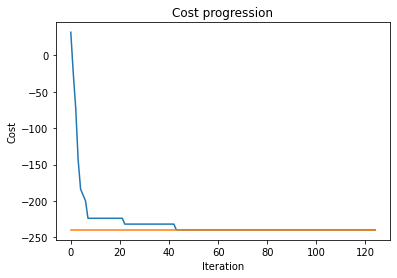

Test 2: Hawajskas ordered: 6.0


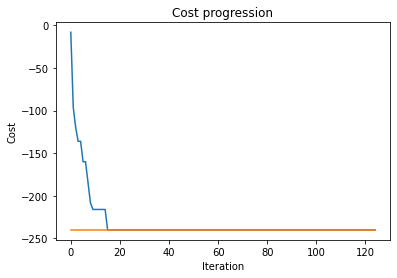

Test 3: Hawajskas ordered: 6.0


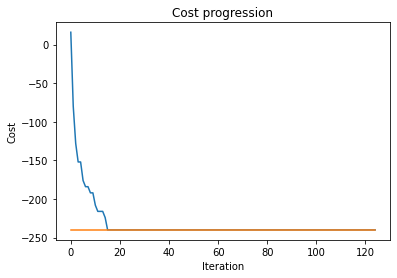

In [16]:
preferences = np.array([hawaiian_extremist] * 6)

perfect_result = np.array([hawaiian_result] * 8 * 6)

for i in range(3):
    print(f"Test {i + 1}: ", end='')
    test_preferences(preferences, n_slices, perfect_result)

## Testowanie algorytmu w przypadku 6 fanatyków carbonary

Test 1: Carbonaras ordered: 6.0


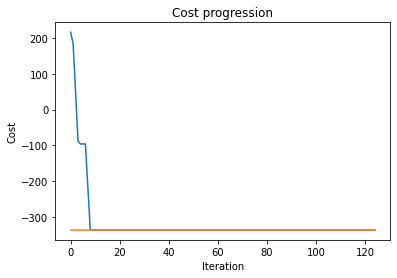

Test 2: Carbonaras ordered: 6.0


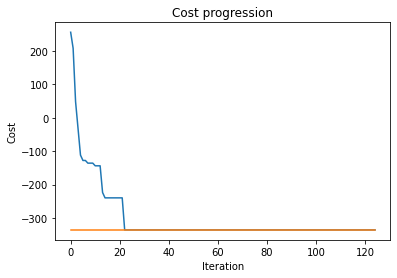

Test 3: Carbonaras ordered: 6.0


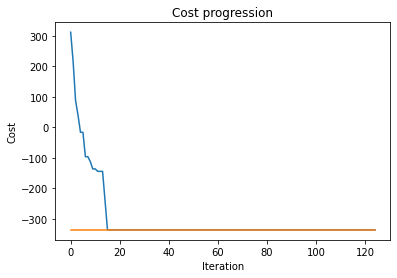

In [17]:
preferences = np.array([carbonara_extremist] * 6)

perfect_result = np.array([carbonara_result] * 8 * 6)

for i in range(3):
    print(f"Test {i + 1}: ", end='')
    test_preferences(preferences, n_slices, perfect_result)

## Testowanie algorytmu w przypadku 2 fanatyków margharity, 2 hawajskiej i 2 carbonary

Test 1: Margharitas ordered: 3.0
Hawajskas ordered: 1.0
Carbonaras ordered: 2.0


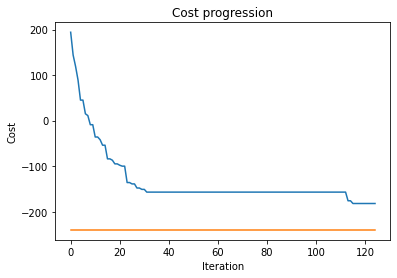

Test 2: Margharitas ordered: 1.0
Salamis ordered: 1.0
Szynkas ordered: 1.0
Hawajskas ordered: 1.0
Carbonaras ordered: 2.0


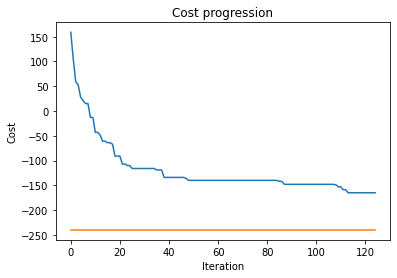

Test 3: Margharitas ordered: 2.0
Szynkas ordered: 2.0
Carbonaras ordered: 2.0


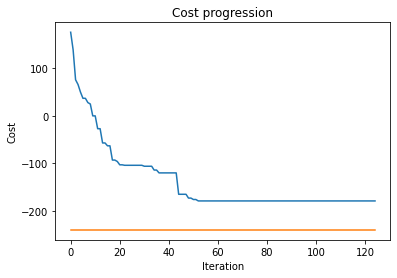

In [18]:
preferences = np.array(
    [margharita_extremist] * 2 +
    [hawaiian_extremist] * 2 +
    [carbonara_extremist] * 2
)

perfect_result = np.array(
    [margharita_result] * 8 * 2 +
    [hawaiian_result] * 8 * 2 +
    [carbonara_result] * 8 * 2
)

for i in range(3):
    print(f"Test {i + 1}: ", end='')
    test_preferences(preferences, n_slices, perfect_result)

## Testowanie algorytmu w przypadku 20 fanatyków carbonary

Test 1: Margharitas ordered: 3.0
Góralskas ordered: 2.0
BBQ z wołowinąs ordered: 1.0
Carbonaras ordered: 12.0
Broccolis ordered: 2.0


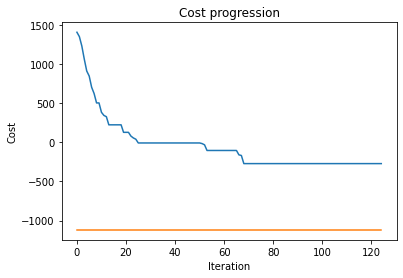

Test 2: Margharitas ordered: 2.0
Salamis ordered: 1.0
Rusticas ordered: 1.0
Bacys ordered: 1.0
Brasils ordered: 1.0
BBQ z wołowinąs ordered: 1.0
Carbonaras ordered: 12.0
Verduras ordered: 1.0


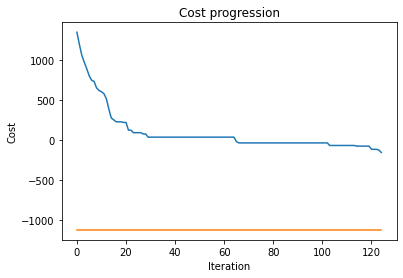

Test 3: Margharitas ordered: 2.0
Funghis ordered: 1.0
Salamis ordered: 1.0
Rusticas ordered: 1.0
Góralskas ordered: 2.0
BBQ z wołowinąs ordered: 1.0
Carbonaras ordered: 12.0


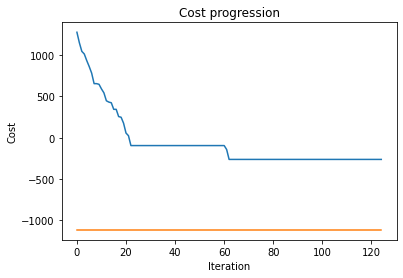

In [19]:
n_customers = 20
n_slices = np.ones(n_customers, dtype=int) * 8

preferences = np.array([carbonara_extremist] * 20)

perfect_result = np.array([carbonara_result] * 8 * 20)

for i in range(3):
    print(f"Test {i + 1}: ", end='')
    test_preferences(preferences, n_slices, perfect_result)

## Testowanie algorytmu w przypadku 20 fanatyków margharity, 20 hawajskiej i 20 carbonary

Test 1: Margharitas ordered: 16.0
Funghis ordered: 2.0
Salamis ordered: 5.0
Szynkas ordered: 5.0
Rusticas ordered: 11.0
Kurczaks ordered: 4.0
Pescatores ordered: 1.0
Capri Firmowas ordered: 1.0
Góralskas ordered: 1.0
Hawajskas ordered: 3.0
Rafaellos ordered: 2.0
Przysmak Biskupas ordered: 1.0
Carbonaras ordered: 8.0


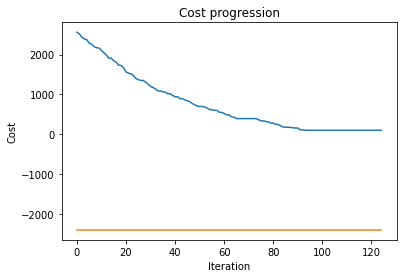

Test 2: Margharitas ordered: 16.0
Funghis ordered: 3.0
Salamis ordered: 2.0
Szynkas ordered: 4.0
Rusticas ordered: 13.0
Kurczaks ordered: 6.0
Wiejskas ordered: 1.0
Capri Firmowas ordered: 1.0
Góralskas ordered: 2.0
Hawajskas ordered: 8.0
Carbonaras ordered: 4.0


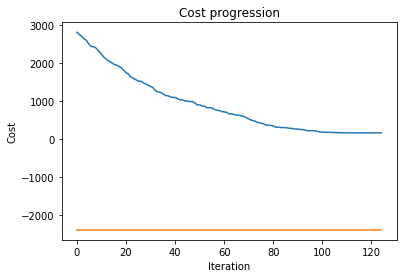

Test 3: Margharitas ordered: 14.0
Funghis ordered: 5.0
Salamis ordered: 2.0
Szynkas ordered: 13.0
Rusticas ordered: 11.0
Kurczaks ordered: 2.0
Capri Firmowas ordered: 1.0
Hawajskas ordered: 5.0
Amores ordered: 1.0
Przysmak Biskupas ordered: 1.0
Primaveras ordered: 1.0
Carbonaras ordered: 4.0


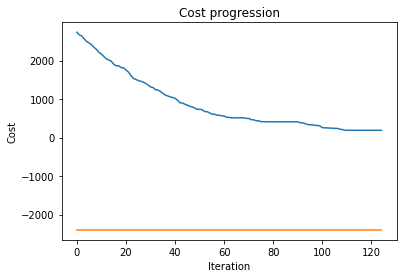

In [20]:
n_customers = 60
n_slices = np.ones(n_customers, dtype=int) * 8

preferences = np.array(
    [margharita_extremist] * 20 +
    [hawaiian_extremist] * 20 +
    [carbonara_extremist] * 20
)

perfect_result = np.array(
    [margharita_result] * 8 * 20 +
    [hawaiian_result] * 8 * 20 +
    [carbonara_result] * 8 * 20
)

for i in range(3):
    print(f"Test {i + 1}: ", end='')
    test_preferences(preferences, n_slices, perfect_result)

### Wnioski
Jak widać, algorytm zbiega do poprawnych rozwiązań, ale ma problemy ze skalowalnością.

# Testowanie przypadków brzegowych

## Klienci lubiący wszystkie rodzaje składników

Test 1: Królewskas ordered: 2.5


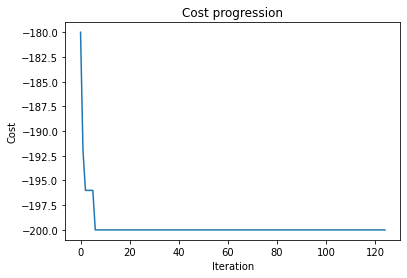

Test 2: Królewskas ordered: 2.5


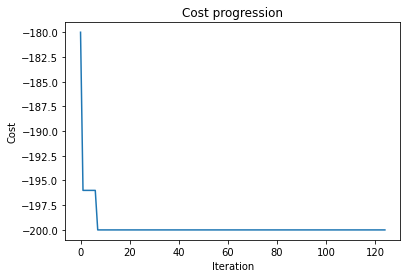

Test 3: Królewskas ordered: 2.5


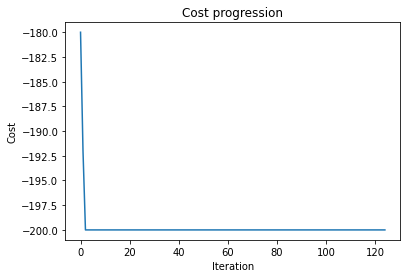

In [10]:
n_customers = 5
n_slices = np.ones(n_customers, dtype=int) * 4

preferences = np.array([np.ones(len(pizzas[0])) for _ in range(n_customers)])

coefs = np.array([1, 1])
for i in range(3):
    print(f"Test {i + 1}: ", end='')
    test_preferences(preferences, n_slices, coefs=coefs)

### Wniosek
Jeżeli każdy składnik jest lubiany, algorytm znajduje pizzę z największą ich liczbą - Królewską.

## Klienci, który nie lubią żadnego składnika

Test 1: Margharitas ordered: 2.5


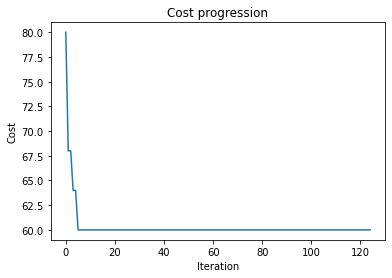

Test 2: Margharitas ordered: 2.5


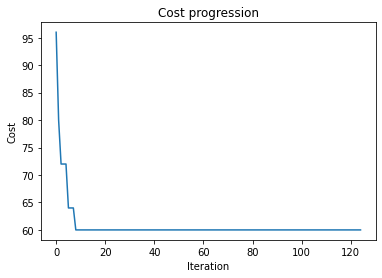

Test 3: Margharitas ordered: 2.5


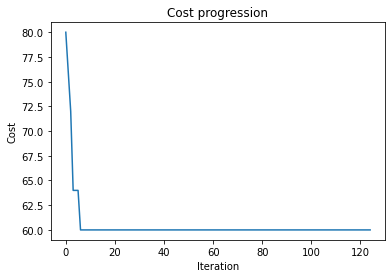

In [11]:
n_customers = 5
n_slices = np.ones(n_customers, dtype=int) * 4

preferences = np.array([-1 * np.ones(len(pizzas[0])) for _ in range(n_customers)])

coefs = np.array([1, 1])
for i in range(3):
    print(f"Test {i + 1}: ", end='')
    test_preferences(preferences, n_slices, coefs=coefs)

### Wniosek
Jeżeli żaden składnik nie jest lubiany, algorytm znajduje pizzę z najmniejszą ich liczbą - Margharitę.

## Dwóch sprzecznych klientów
Oboje chcą 4 kawałki (pizza ma 8) i posiadają losowe, ale przeciwne sobie preferencje.

In [80]:
n_customers = 2
n_slices = np.ones(n_customers, dtype=int) * 4

customer1 = np.random.rand(len(pizzas[0]))
customer1 = np.where(customer1 < 0.5, -1, 1)
customer2 = customer1 * -1

preferences = np.array([customer1, customer2])

### Równe współczynniki przy zliczaniu lubianych i nielubianych kawałków

In [89]:
coefs = np.array([1, 1])
for i in range(10):
    print(f"Test {i + 1}: ", end='')
    test_preferences(preferences, n_slices, coefs=coefs)

Test 1: Funghis ordered: 1.0
Test 2: BBQ z wołowinąs ordered: 1.0
Test 3: Tricolores ordered: 1.0
Test 4: Szynkas ordered: 1.0
Test 5: Przysmak Biskupas ordered: 1.0
Test 6: Chicagos ordered: 1.0
Test 7: BBQ z kurczakiems ordered: 1.0
Test 8: Rafaellos ordered: 1.0
Test 9: Przysmak Biskupas ordered: 1.0
Test 10: Neapolitanas ordered: 1.0


### Wniosek
Jak widać, gdy współczynniki są równe, bez względu na starania algorytmu, koszt funkcji zawsze wynosi zero, ponieważ preferencje dwóch klientów się znoszą.

### Nielubiane składniki mnożone razy 2

In [92]:
coefs = np.array([1, 2])
for i in range(5):
    print(f"Test {i + 1}: ", end='')
    test_preferences(preferences, n_slices, coefs=coefs)

Test 1: Margharitas ordered: 1.0
Test 2: Margharitas ordered: 1.0
Test 3: Margharitas ordered: 1.0
Test 4: Margharitas ordered: 1.0
Test 5: Margharitas ordered: 1.0


### Wniosek
Gdy karamy algorytm za źle dopasowane składniki, wybiera on pizzę z najmniejszą ich liczbą.

### Lubiane składniki mnożone razy 2

In [93]:
coefs = np.array([2, 1])
for i in range(5):
    print(f"Test {i + 1}: ", end='')
    test_preferences(preferences, n_slices, coefs=coefs)

Test 1: Królewskas ordered: 1.0
Test 2: Królewskas ordered: 1.0
Test 3: Królewskas ordered: 1.0
Test 4: Królewskas ordered: 1.0
Test 5: Królewskas ordered: 1.0


In [94]:
print("Królewskas ingredients:")
print(get_ingredients("Królewska"))

Królewskas ingredients:
boczek czerwona cebula kiełbasa oregano papryka pieczarki salami ser sos pomidorowy szynka


### Wniosek
Gdy mocno nagradzamy za dopasowanie składników, algorytm dobiera pizze z największą ich liczbą.